In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors
from numpy import pi, cos, sin, tan, sqrt, cbrt, abs
from scipy.ndimage import uniform_filter
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#-------------------------------
BIG_NUM = np.inf
# -------------- Droplets +

def S_droplet_pi(l, phi,k):
    r = cbrt(3*phi*k*l**2/ (4*pi))
    if 2*r < 1 and 2*r < l*k:
        return 4*pi*r**2

    return BIG_NUM

# ------------- Donuts
def S_donut_pi(l, phi, k):

    V = phi*k*(l**2)

    if (pi/8)**2 + V/pi - 1/6 < 0: return BIG_NUM

    d = -pi/8 + sqrt((pi/8)**2 + V/pi - 1/6)
    if 2*d + 1 < l*k and d > 0:
        return pi*(1+d*pi) + 2*pi*(d**2)
    return BIG_NUM

def S_perf_pi(l, phi, k):

    V = (1 - phi) * k * (l ** 2)

    if (pi / 8) ** 2 + V / pi - 1 / 6 < 0: return BIG_NUM

    d = pi / 8 + sqrt((pi / 8) ** 2 + V / pi - 1 / 6)
    if d - 0.5 > 0 and 2*d < l*k:
        return pi * (-1 + d * pi) + 2*k * l**2 - 2 * pi * (d ** 2)
    return BIG_NUM

#--------------Worms +

def S_worm_pi(l, phi, k):
    r = sqrt(phi * l / pi)
    if 2*r < 1 and 2*r < l :
        return 2 * pi * l*k * r

    return BIG_NUM



#--------------Rolls +

def S_roll_pi(l, phi, k):
    d = phi*l - pi/4
    if d + 1 < l and d > 0:
        return k*l*(2*d + pi)

    return BIG_NUM

#--------------Layer +
def S_layer_pi(l, phi, k):
    return 2 * k * (l ** 2)
#----------------------------------------------


def draw_phase_diagramm(N_phi, M_l, theta, k , l_max=7):
    arr_phi = np.linspace(0, 1, N_phi, endpoint=True)

    arr_l = np.linspace(0.001, l_max, M_l, endpoint=True)
    grid = np.zeros((M_l, N_phi), dtype=int)

    for i, l in enumerate(arr_l):
        for j, phi in enumerate(arr_phi):
            #Сюда свои функции надо
            S = np.array([
                S_droplet_pi(l, phi, k),
                S_donut_pi(l, phi, k),
                S_worm_pi(l, phi, k),
                S_roll_pi(l, phi, k),

                S_perf_pi(l, phi, k),


                S_layer_pi(l, phi, k),
                #--------
            ])

            grid[i, j] = np.argmin(S)


    return grid

#Эта штука как-то нужна в выводе графика
def check_neighbors(i, j, grid):
    value = grid[i, j]
    neighbors = []
    for x in range(i-1, i+2):
        for y in range(j-1, j+2):
            if 0 <= x < grid.shape[0] and 0 <= y < grid.shape[1]:
                neighbors.append(grid[x, y])

    return np.allclose(value, neighbors)

theta = 180
l = 7
K = 1
print('Processing '+str(theta))
WIDTH, HEIGHT = 500, 500
grid = draw_phase_diagramm(WIDTH, HEIGHT, np.deg2rad(theta),K , l_max=l)

mask = np.ones_like(grid)

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if check_neighbors(i, j, grid):
            mask[i, j] = 0
print("Done")

Processing 180
Done


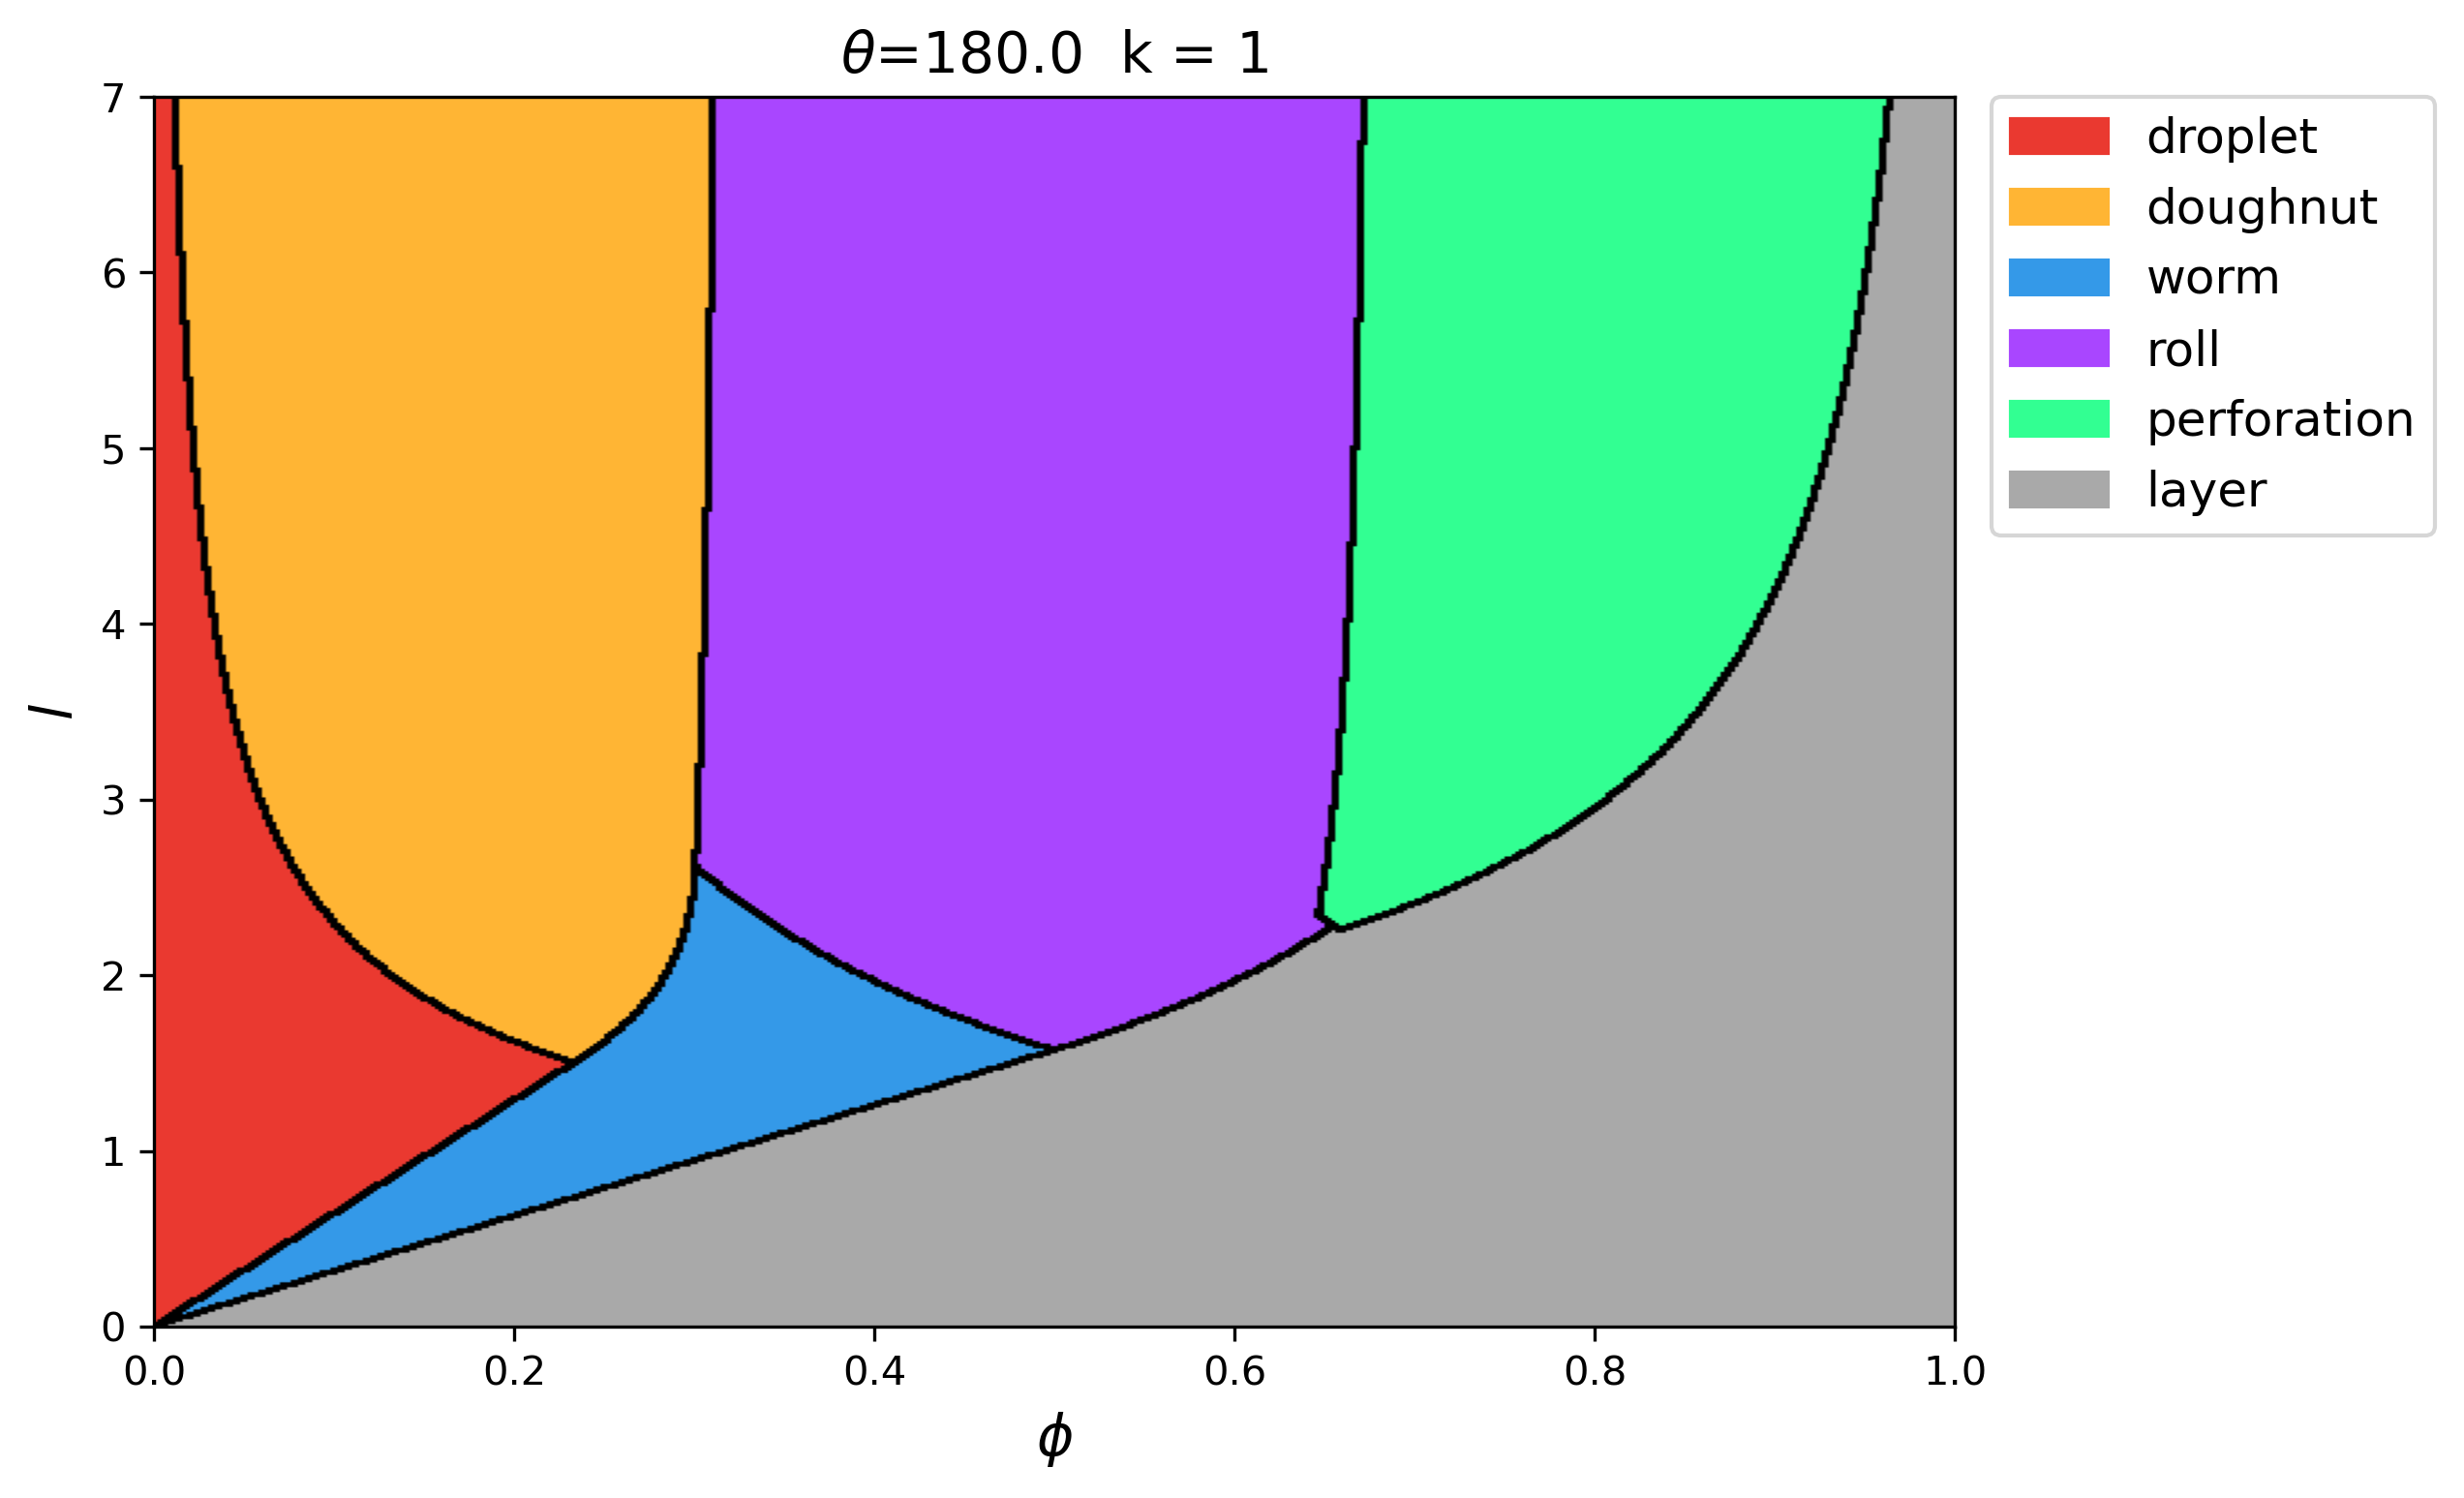

In [ ]:

matplotlib.rc('font', serif='Helvetica Neue')

size = 1 # параметр сглаживания, можете настроить по вашему вкусу
sigma = 1
smoothed_mask = uniform_filter(mask.astype(float), size=size)
# smoothed_mask = gaussian_filter(mask.astype(float), sigma=sigma)
scale = 1
fig, ax = plt.subplots(figsize=(8*scale, 5.5*scale), dpi = 300)
ax.set_title(r'$\theta$'+'={:.1f}'.format(theta) + "  k = " + str(K), fontsize=14)

names = np.array(['droplet', 'doughnut', 'worm', 'roll', 'perforation', 'layer'])
colors = ["#ea3930", "#ffb534", "#3499e8", "#a946ff", "#32ff92", "#a9a9a9"]
color_map = matplotlib.colors.ListedColormap(colors)
ax.imshow(grid[::-1, :], cmap=color_map, extent=[0, 1, 0, l], aspect="auto")

# np.save(f'phase_diagrams/{theta}_grid', grid)

smooth_name = "smooth pallete"
smooth_colors = [(0, 0, 0, 0), (0, 0, 0, 1)]  # от прозрачности до непрозрачности
n_bins = 100  # количество оттенков в градиенте
smooth_cmap = LinearSegmentedColormap.from_list(smooth_name, smooth_colors, N=n_bins)

# ax.imshow(smoothed_mask > 0, cmap='gray', alpha=smoothed_mask[::-1, :])
ax.imshow(smoothed_mask[::-1, :], cmap=smooth_cmap, extent=[0, 1, 0, l], aspect="auto", vmin=0, vmax=1)
# np.save(f'phase_diagrams/{theta}_mask', smoothed_mask)

patches = [ mpatches.Patch(color=colors[i], label=names[i]) for i in range(6) ]
lgd = ax.legend(handles=patches, bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0. , fontsize=12)

ax.set_xlabel(r'$\phi$', fontsize=14)
ax.set_ylabel(r'$l$', fontsize=14)

# fig.savefig(f'img/{str(theta) + " " + str(k)}.png', bbox_inches='tight')
plt.show()
